# Brazil Job Analysis
## Based on the dataset from Luke, I would like to analyze the job market in Brazil. Things I want to look at:
    - Average salaries
    - Max salaries rates
    - Min salaries rates
    - Analyze the location of each salaries
    - Find out which states have the most jobs
    - Analyze when most of these jobs were posted

In [2]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

In [3]:
# Load the dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [4]:
# Transforming the job_posted_date into a DateTime object
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])   # Convert the job_posted_date to datetime object    
df["job_posted_year"] = df["job_posted_date"].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

## Let's look at all the info available in the dataset

In [5]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_year
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,2023
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",2023
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",2023
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",2023
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",2023
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",2023
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",2023


# Let's drop all the NaN values found in the salary_year_avg

In [6]:
df.dropna(subset=["salary_year_avg"], inplace = True)
df


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_year
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd...",2023
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac...",2023
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}",2023
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr...",2023
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro...",2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"['go', 'python', 'r', 'sql', 'oracle', 'window...","{'analyst_tools': ['alteryx', 'power bi', 'tab...",2023
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None,2023
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"['python', 'azure', 'snowflake', 'spark']","{'cloud': ['azure', 'snowflake'], 'libraries':...",2023
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"['python', 'hadoop', 'spark', 'airflow', 'kube...","{'libraries': ['hadoop', 'spark', 'airflow'], ...",2023


## Let's filter the dataset where job_country = Brazil

In [7]:
df_brazil = df[df["job_country"] == "Brazil"]
df_brazil

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_year
15289,Senior Data Engineer,"[Job- 10639] Senior Data Engineer Developer, B...",Brazil,via Ai-Jobs.net,Full-time,False,Brazil,2023-06-13 13:21:09,False,False,Brazil,year,147500.0,NaN,CI&T,"['python', 'azure', 'aws', 'gdpr']","{'cloud': ['azure', 'aws'], 'libraries': ['gdp...",2023
15650,Software Engineer,Senior Backend Engineer,Anywhere,via EchoJobs,Full-time,True,Brazil,2023-06-13 13:21:14,False,True,Brazil,year,161000.0,NaN,Vareto,"['python', 'sql', 'postgresql', 'aurora', 'air...","{'analyst_tools': ['excel'], 'cloud': ['aurora...",2023
18670,Data Scientist,"[10418 ] Data Developer Master, Brazil",Brazil,via Ai-Jobs.net,Full-time,False,Brazil,2023-05-18 13:07:43,False,False,Brazil,year,72000.0,NaN,CI&T,"['sql', 'sql server', 'azure', 'oracle', 'aws'...","{'cloud': ['azure', 'oracle', 'aws', 'redshift...",2023
36013,Data Analyst,Data Analyst,"São Paulo, State of São Paulo, Brazil",via Ai-Jobs.net,Full-time,False,Brazil,2023-08-01 13:22:38,True,False,Brazil,year,57500.0,NaN,Media.Monks,"['express', 'excel', 'looker', 'sheets']","{'analyst_tools': ['excel', 'looker', 'sheets'...",2023
51131,Senior Data Analyst,Senior Data Analyst | Product Analytics,"São Paulo, State of São Paulo, Brazil",via Ai-Jobs.net,Full-time,False,Brazil,2023-02-24 06:41:54,False,False,Brazil,year,111175.0,NaN,Gympass,"['sql', 'python', 'tableau']","{'analyst_tools': ['tableau'], 'programming': ...",2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757578,Data Scientist,Junior Data Scientist,"Rio de Janeiro, State of Rio de Janeiro, Brazil",via Ai-Jobs.net,Full-time,False,Brazil,2023-02-16 20:19:11,False,False,Brazil,year,69962.5,NaN,Shape,"['python', 'sql', 'azure', 'aws', 'scikit-lear...","{'cloud': ['azure', 'aws'], 'libraries': ['sci...",2023
757835,Senior Data Engineer,"[JOB 11078] Senior Data Engineer, Brazil",Brazil,via Ai-Jobs.net,Full-time,False,Brazil,2023-07-24 20:20:14,False,False,Brazil,year,147500.0,NaN,CI&T,"['sql', 'nosql', 'scala', 'python', 'aws', 'az...","{'cloud': ['aws', 'azure', 'gcp'], 'libraries'...",2023
762103,Data Scientist,Staff Threat Research Engineer,"São Paulo, State of São Paulo, Brazil",via Ai-Jobs.net,Full-time,False,Brazil,2023-07-03 20:16:29,False,False,Brazil,year,177283.0,NaN,Netskope,"['sql', 'bigquery', 'spark']","{'cloud': ['bigquery'], 'libraries': ['spark']...",2023
767278,Data Scientist,[10837] Data Scientist Mid Level,Brazil,via Ai-Jobs.net,Full-time,False,Brazil,2023-07-04 01:16:21,False,False,Brazil,year,90670.0,NaN,CI&T,None,None,2023


## There's too many columns to look at. Let's only see the following columns:
    - job_title_short
    - salary_year_avg
    
##  With that, we can see the average salary for each position per year in Brazil

In [40]:
br_salaries_per_title = df_brazil.groupby("job_title_short")["salary_year_avg"].mean()
br_salaries_per_title.sort_values(ascending=False, inplace=True)

# Adding cloud engineer and business analyst so they can appear in the graph
br_salaries_per_title["Cloud Engineer"] = 0     
br_salaries_per_title["Business Analyst"] = 0

## Let's compare to the same jobs in the US

In [35]:
df_us = df[df["job_country"] == "United States"]
us_salaries_per_title = df_us.groupby("job_title_short")["salary_year_avg"].mean()
us_salaries_per_title.sort_values(ascending=False, inplace=True)
us_salaries_per_title


job_title_short
Senior Data Scientist        159330.432029
Machine Learning Engineer    154240.382812
Senior Data Engineer         151448.023186
Data Scientist               139946.707204
Software Engineer            137964.929588
Data Engineer                134226.676753
Cloud Engineer               120090.900000
Senior Data Analyst          115729.129954
Business Analyst              96175.447397
Data Analyst                  94553.964924
Name: salary_year_avg, dtype: float64

## Cool, we see a lot of numbers. Let's look at this data on a graph

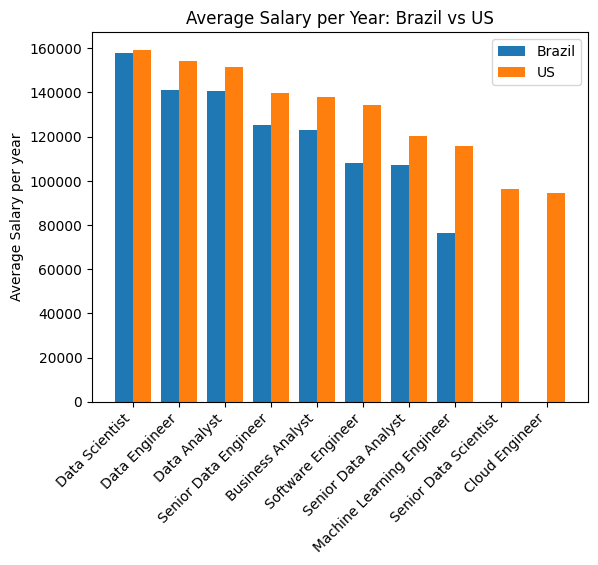

In [48]:
job_titles = df["job_title_short"].unique()    # job_titles
br_salaries = br_salaries_per_title.values     # br_salaries
us_salaries = us_salaries_per_title.values  # us_salaries
  
x_axis = np.arange(len(job_titles)) # length of job_titles
  
plt.bar(x_axis - 0.2, br_salaries, 0.4, label = 'Brazil') 
plt.bar(x_axis + 0.2, us_salaries, 0.4, label = 'US') 

plt.xticks(x_axis, job_titles, rotation=45, ha='right')
plt.ylabel("Average Salary per year") 
plt.title("Average Salary per Year: Brazil vs US") 
plt.legend() 
plt.show() 

## Great! We can see that there is no Senior Data Scientist or Cloud Engineer positions in Brazil. Also, the US pays slightly more than Brazil.
## Now, let's see the highest position in each country.

In [119]:
# Get the index of max values of each dataframe
max_br_index = df_brazil["salary_year_avg"].idxmax()
highest_br_salary = df_brazil.loc[max_br_index]

max_us_index = df_us["salary_year_avg"].idxmax()
highest_us_salary = df_us.loc[max_us_index]

print("Brazil highest salary\n","\tJob title:",highest_br_salary["job_title_short"] , "\n\tsalary: $", highest_br_salary["salary_year_avg"])
print("US highest salary\n", "\tJob title:", highest_us_salary["job_title_short"], "\n\tsalary: $", highest_us_salary["salary_year_avg"])


Brazil highest salary
 	Job title: Senior Data Engineer 
	salary: $ 224000.0
US highest salary
 	Job title: Data Scientist 
	salary: $ 960000.0


## Great! That's a huge difference between each country. Let's look now at the lowest salary in each country.

In [120]:
# Get the index of max values of each dataframe
min_br_index = df_brazil["salary_year_avg"].idxmin()
lowest_br_salary = df_brazil.loc[min_br_index]

min_us_index = df_us["salary_year_avg"].idxmin()
lowest_us_salary = df_us.loc[min_us_index]

print("Brazil lowest salary\n","\tJob title:",lowest_br_salary["job_title_short"] , "\n\tsalary: $", lowest_br_salary["salary_year_avg"])
print("US lowest salary\n", "\tJob title:", lowest_us_salary["job_title_short"], "\n\tsalary: $", lowest_us_salary["salary_year_avg"])


Brazil lowest salary
 	Job title: Data Engineer 
	salary: $ 15000.0
US lowest salary
 	Job title: Data Engineer 
	salary: $ 23496.0


## Now, let's analyze the location of each job and see which places has the most job postings

## Let's analyze now what locations has the least job postings

## And lastly, let's inspect the date of each job posting and find out when these jobs were posted the most.